In [1]:
%matplotlib inline

from numpy import *
from numpy.linalg import solve, norm    # Solve linear systems and compute norms
from matplotlib.pyplot import *
from math import factorial
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

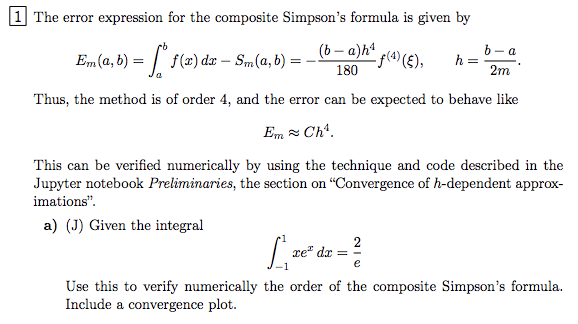

h = 1.00e+00,   S(a,b) = 0.78346746,   e(h) = 4.77e-02
h = 5.00e-01,   S(a,b) = 0.73913060,   e(h) = 3.37e-03
h = 2.50e-01,   S(a,b) = 0.73597650,   e(h) = 2.18e-04
h = 1.25e-01,   S(a,b) = 0.73577259,   e(h) = 1.37e-05
h = 6.25e-02,   S(a,b) = 0.73575974,   e(h) = 8.59e-07
h = 3.12e-02,   S(a,b) = 0.73575894,   e(h) = 5.37e-08
h = 1.56e-02,   S(a,b) = 0.73575889,   e(h) = 3.36e-09
h = 7.81e-03,   S(a,b) = 0.73575888,   e(h) = 2.10e-10
h = 3.91e-03,   S(a,b) = 0.73575888,   e(h) = 1.31e-11
h = 1.95e-03,   S(a,b) = 0.73575888,   e(h) = 8.19e-13

The order p and the error constant C
h = 5.00e-01,  p = 3.95,  C = 0.0522
h = 2.50e-01,  p = 3.99,  C = 0.0548
h = 1.25e-01,  p = 4.00,  C = 0.0558
h = 6.25e-02,  p = 4.00,  C = 0.0562
h = 3.12e-02,  p = 4.00,  C = 0.0563
h = 1.56e-02,  p = 4.00,  C = 0.0563
h = 7.81e-03,  p = 4.00,  C = 0.0563
h = 3.91e-03,  p = 4.00,  C = 0.0564


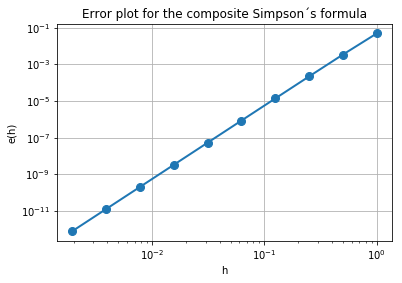

In [2]:
def simpson(f, a, b, m=10):
# Find an approximation to an integral by the composite Simpson's method:
# Input:  
#   f:    integrand
#   a, b: integration interval
#   m:    number of subintervals
# Output: The approximation to the integral
    n = 2*m
    x_noder = linspace(a, b, n+1)       # equidistributed nodes from a to b 
    h = (b-a)/n                         # stepsize
    S1 = f(x_noder[0]) + f(x_noder[n])  # S1 = f(x_0)+f(x_n)
    S2 = sum(f(x_noder[1:n:2]))         # S2 = f(x_1)+f(x_3)+...+f(x_m)
    S3 = sum(f(x_noder[2:n-1:2]))       # S3 = f(x_2)+f(x_4)+...+f(x_{m-1})
    S = h*(S1 + 4*S2 + 2*S3)/3
    return S

# Define the function
def f(x):
    return x*exp(x)

# Integration interval
a, b = -1, 1
exact = 2/exp(1)

# Find an numerical approximation for different values of h.
# Store the stepsize h and the error
n = 1
h = (b-a)/(2*n)
steps = []
errors = []
Nmax = 10
for k in range(Nmax):
    numres = simpson(f, a, b, m=n) # Numerical approximation
    eh = abs(exact - numres)    # Error e(h)
    print('h = {:8.2e},   S(a,b) = {:10.8f},   e(h) = {:8.2e}'.format(h, numres, eh))
    steps.append(h)
    errors.append(eh)
    n = 2*n
    h = (b-a)/(2*n)

print("\nThe order p and the error constant C")
for k in range(1, Nmax-1):
    p = log(errors[k+1]/errors[k])/log(steps[k+1]/steps[k])
    C = errors[k+1]/steps[k+1]**p
    print('h = {:8.2e},  p = {:4.2f},  C = {:6.4f}'.format(steps[k], p, C))

# Make an error plot aka convergence plot for the composite Simpson´s formula
clf()
loglog(steps, errors, 'o-')
xlabel('h')
ylabel('e(h)')
title('Error plot for the composite Simpson´s formula')
grid(True)



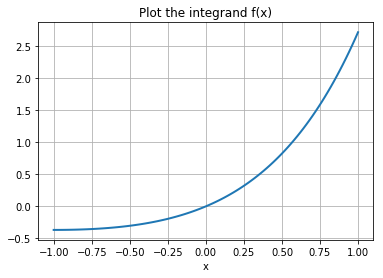

In [3]:
x = linspace(-1, 1, 101)
plot(x, f(x))
title('Plot the integrand f(x)');
xlabel('x');

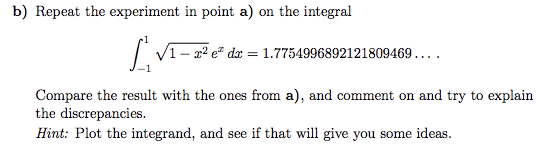

h = 1.00e+00,   S(a,b) = 1.33333333,   e(h) = 4.42e-01
h = 5.00e-01,   S(a,b) = 1.63540364,   e(h) = 1.40e-01
h = 2.50e-01,   S(a,b) = 1.72886020,   e(h) = 4.66e-02
h = 1.25e-01,   S(a,b) = 1.75945841,   e(h) = 1.60e-02
h = 6.25e-02,   S(a,b) = 1.76989907,   e(h) = 5.60e-03
h = 3.12e-02,   S(a,b) = 1.77353123,   e(h) = 1.97e-03
h = 1.56e-02,   S(a,b) = 1.77480571,   e(h) = 6.94e-04
h = 7.81e-03,   S(a,b) = 1.77525467,   e(h) = 2.45e-04
h = 3.91e-03,   S(a,b) = 1.77541312,   e(h) = 8.66e-05
h = 1.95e-03,   S(a,b) = 1.77546909,   e(h) = 3.06e-05

The order p and the error constant C
h = 5.00e-01,  p = 1.59,  C = 0.4208
h = 2.50e-01,  p = 1.54,  C = 0.3943
h = 1.25e-01,  p = 1.52,  C = 0.3769
h = 6.25e-02,  p = 1.51,  C = 0.3670
h = 3.12e-02,  p = 1.50,  C = 0.3614
h = 1.56e-02,  p = 1.50,  C = 0.3583
h = 7.81e-03,  p = 1.50,  C = 0.3565
h = 3.91e-03,  p = 1.50,  C = 0.3556


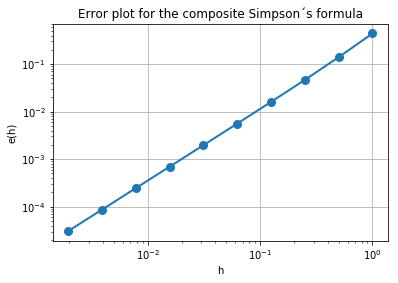

In [4]:
# Define a the new function
def g(x):
    return sqrt(1-x**2)*exp(x)

# Integration interval
a, b = -1, 1
exact = 1.7754996892121809469

# Find an numerical approximation for different values of h.
# Store the stepsize h and the error
n = 1
h = (b-a)/(2*n)
steps = []
errors = []
Nmax = 10
for k in range(Nmax):
    numres = simpson(g, a, b, m=n) # Numerical approximation
    eh = abs(exact - numres)    # Error e(h)
    print('h = {:8.2e},   S(a,b) = {:10.8f},   e(h) = {:8.2e}'.format(h, numres, eh))
    steps.append(h)
    errors.append(eh)
    n = 2*n
    h = (b-a)/(2*n)

print("\nThe order p and the error constant C")
for k in range(1, Nmax-1):
    p = log(errors[k+1]/errors[k])/log(steps[k+1]/steps[k])
    C = errors[k+1]/steps[k+1]**p
    print('h = {:8.2e},  p = {:4.2f},  C = {:6.4f}'.format(steps[k], p, C))

# Make an error plot aka convergence plot for the composite Simpson´s formula
clf()
loglog(steps, errors, 'o-')
xlabel('h')
ylabel('e(h)')
title('Error plot for the composite Simpson´s formula')
grid(True)




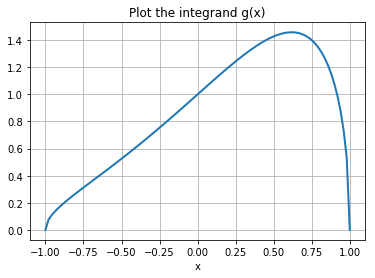

In [5]:
x = linspace(-1, 1, 101)
plot(x, g(x))
title('Plot the integrand g(x)');
xlabel('x');

For comparison we see that the fixed point iterations fo g converges slower than for f.

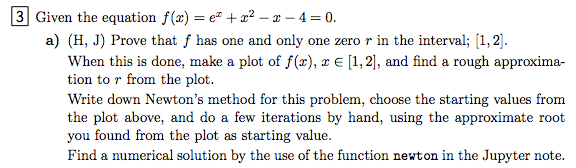

By looking at the graph a rough approximation to r could be 1.28


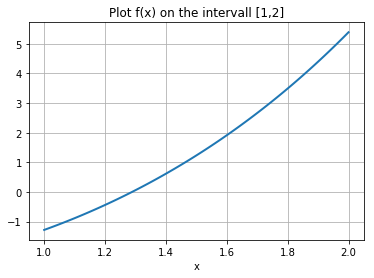

In [6]:
def h(x):
    return exp(x) + x**2 - x - 4

def dh(x):
    return exp(x) + 2*x -1

a, b = 1, 2
x = linspace(a,b,101)
plot(x, h(x))
title('Plot f(x) on the intervall [1,2]');
xlabel('x');
print("By looking at the graph a rough approximation to r could be 1.28")

In [7]:
def newton(f, df, x0, tol=1.e-8, max_iter=30):
    # Solve f(x)=0 by Newtons method
    # The output of each iteration is printed
    # Input:
    #   f, df:   The function f and its derivate f'.
    #   x0:  Initial values
    #   tol: The tolerance
    # Output:
    #   The root and the number of iterations
    x = x0
    print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(0, x, f(x)))
    for k in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:           # Accept the solution 
            break 
        x = x - fx/df(x)            # Newton-iteration
        print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(k+1, x, f(x)))
    return x, k+1

x_start = 1.28 # Taken as a rough approx from the plot above
x, nit = newton(h, dh, x_start, tol=1.e-14, max_iter=30)
print('\n\nResult:\nx={}, number of iterations={}'.format(x, nit))

k =  0, x =  1.280000000000000, f(x) = -4.496e-02
k =  1, x =  1.288718909371888, f(x) =  2.131e-04
k =  2, x =  1.288677967730043, f(x) =  4.717e-09
k =  3, x =  1.288677966823868, f(x) = -4.441e-16


Result:
x=1.2886779668238684, number of iterations=4


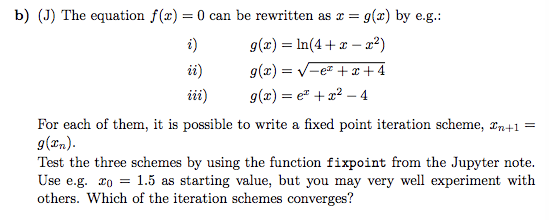

In [8]:
def fixpoint(g, x0, tol=1.e-8, max_iter=30):
    # Solve x=g(x) by fixed point iterations
    # The output of each iteration is printed
    # Input:
    #   g:   The function g(x)
    #   x0:  Initial values
    #   tol: The tolerance
    # Output:
    #   The root and the number of iterations
    x = x0
    print('k ={:3d}, x = {:14.10f}'.format(0, x))  
    for k in range(max_iter):        
        x_old = x                        # Store old values for error estimation 
        x = g(x)                         # The iteration
        err = abs(x-x_old)               # Error estimate
        print('k ={:3d}, x = {:14.10f}'.format(k+1, x))
        if err < tol:          # The solution is accepted 
            break
    return x, k+1

def i1(x):
    return log(4+x-x**2)

def i2(x):
    return sqrt(-exp(x) + x + 4)

def i3(x):
    return exp(x) + x**2 -4

x_0 = 1.5
tol = 1.e-6
max_iter = 30

# Apply the fixed point scheme
x, nit = fixpoint(i1, x0=x_0, tol=tol, max_iter=max_iter)
print('\n\nResultat for i1:\nx = {}, antall iterasjoner={}\n'.format(x, nit))
# Apply the fixed point scheme
x, nit = fixpoint(i2, x0=x_0, tol=tol, max_iter=max_iter)
print('\n\nResultat for i2:\nx = {}, antall iterasjoner={}\n'.format(x, nit))
# Apply the fixed point scheme
x, nit = fixpoint(i3, x0=x_0, tol=tol, max_iter=max_iter)
print('\n\nResultat for i3:\nx = {}, antall iterasjoner={}\n'.format(x, nit))




k =  0, x =   1.5000000000
k =  1, x =   1.1786549963
k =  2, x =   1.3322149248
k =  3, x =   1.2690350905
k =  4, x =   1.2970764687
k =  5, x =   1.2850003170
k =  6, x =   1.2902719159
k =  7, x =   1.2879840175
k =  8, x =   1.2889795000
k =  9, x =   1.2885468343
k = 10, x =   1.2887349735
k = 11, x =   1.2886531806
k = 12, x =   1.2886887430
k = 13, x =   1.2886732816
k = 14, x =   1.2886800038
k = 15, x =   1.2886770812
k = 16, x =   1.2886783519
k = 17, x =   1.2886777994


Resultat for i1:
x = 1.2886777994110854, antall iterasjoner=17

k =  0, x =   1.5000000000
k =  1, x =   1.0091139329
k =  2, x =   1.5053054929
k =  3, x =   0.9998878264
k =  4, x =   1.5105995169
k =  5, x =   0.9905322092
k =  6, x =   1.5158710552
k =  7, x =   0.9810634053
k =  8, x =   1.5211088914
k =  9, x =   0.9714992449
k = 10, x =   1.5263017049
k = 11, x =   0.9618589916
k = 12, x =   1.5314381740
k = 13, x =   0.9521632379
k = 14, x =   1.5365070839
k = 15, x =   0.9424337713
k = 16, x =   1.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


As we can see from the result above i) i1 = ln(4 + x - x^2) is the only one that converges

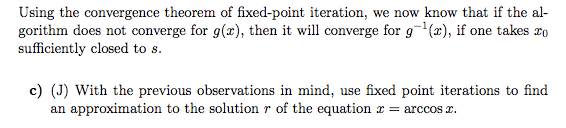

Since g(x) does not converge, we have the inverse equal cos(x) converge (by the convergence theorem of fixed point iteration). Since the fixed point, r, will be the same for the two equations we can find the fixed point of the inverse instead

In [9]:
# The inverse of arcos(x) is cos(x)
def j(x):
    return cos(x)

x_0 = 0.75 
tol = 1.e-6
max_iter = 30

# Apply the fixed point scheme
x, nit = fixpoint(j, x0=x_0, tol=tol, max_iter=max_iter)
print('\n\nResultat for i1:\nx = {}, antall iterasjoner={}\n'.format(x, nit))


k =  0, x =   0.7500000000
k =  1, x =   0.7316888689
k =  2, x =   0.7440470848
k =  3, x =   0.7357336182
k =  4, x =   0.7413385989
k =  5, x =   0.7375652963
k =  6, x =   0.7401080596
k =  7, x =   0.7383956911
k =  8, x =   0.7395493740
k =  9, x =   0.7387723354
k = 10, x =   0.7392958014
k = 11, x =   0.7389432082
k = 12, x =   0.7391807282
k = 13, x =   0.7390207359
k = 14, x =   0.7391285105
k = 15, x =   0.7390559131
k = 16, x =   0.7391048159
k = 17, x =   0.7390718746
k = 18, x =   0.7390940643
k = 19, x =   0.7390791171
k = 20, x =   0.7390891857
k = 21, x =   0.7390824034
k = 22, x =   0.7390869721
k = 23, x =   0.7390838945
k = 24, x =   0.7390859676
k = 25, x =   0.7390845712
k = 26, x =   0.7390855118


Resultat for i1:
x = 0.7390855118200974, antall iterasjoner=26



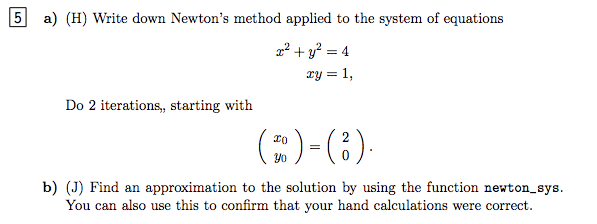

In [10]:
set_printoptions(precision=15)          # Output with high accuracy

In [19]:
def k(x):
    f = x[0]**2 + x[1]**2 - 4
    g = x[0]*x[1] - 1
    return array([f,g])
    
def jac(x):
    f_x = 2*x[0]
    f_y = 2*x[1]
    g_x = x[1]
    g_y = x[0]
    return array([[f_x, f_y], [g_x, g_y]])

def newton_system(f, jac, x0, tol = 1.e-10, max_iter=20):
    x = x0
    print('k ={:3d}, x = '.format(0), x)
    for k in range(max_iter):
        fx = f(x)
        if norm(fx, inf) < tol:          # The solution is accepted. 
            break
        Jx = jac(x)
        delta = solve(Jx, -fx) 
        x = x + delta            
        print('k ={:3d}, x = '.format(k+1), x)
    return x, k

x_start = array([2,0])
max_iter = 20

x, nit = newton_system(k, jac, x_start, tol =1.e-12, max_iter =max_iter)  # Apply Newton's method
  
print('\nTest: f(x)={}'.format(k(x)))
if nit == max_iter:
    printf('Warning: Convergence har not been achieved')


k =  0, x =  [2 0]
k =  1, x =  [2.  0.5]
k =  2, x =  [1.933333333333333 0.516666666666667]
k =  3, x =  [1.931852741096439 0.517637054821929]
k =  4, x =  [1.931851652578934 0.517638090204244]
k =  5, x =  [1.931851652578136 0.517638090205042]

Test: f(x)=[-4.440892098500626e-16  0.000000000000000e+00]


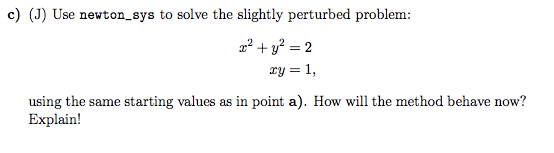

In [20]:
def k2(x):
    f = x[0]**2 + x[1]**2 - 2
    g = x[0]*x[1] - 1
    return array([f,g])
    
def jac2(x):
    f_x = 2*x[0]
    f_y = 2*x[1]
    g_x = x[1]
    g_y = x[0]
    return array([[f_x, f_y], [g_x, g_y]])

x, nit = newton_system(k2, jac2, x_start, tol =1.e-12, max_iter =max_iter)  # Apply Newton's method
  
print('\nTest: f(x)={}'.format(k(x)))
if nit == max_iter:
    printf('Warning: Convergence har not been achieved')

k =  0, x =  [2 0]
k =  1, x =  [1.5 0.5]
k =  2, x =  [1.25 0.75]
k =  3, x =  [1.125 0.875]
k =  4, x =  [1.0625 0.9375]
k =  5, x =  [1.03125 0.96875]
k =  6, x =  [1.015625 0.984375]
k =  7, x =  [1.0078125 0.9921875]
k =  8, x =  [1.00390625 0.99609375]
k =  9, x =  [1.001953125 0.998046875]
k = 10, x =  [1.0009765625 0.9990234375]
k = 11, x =  [1.00048828125 0.99951171875]
k = 12, x =  [1.000244140625 0.999755859375]
k = 13, x =  [1.0001220703125 0.9998779296875]
k = 14, x =  [1.00006103515625 0.99993896484375]
k = 15, x =  [1.000030517578125 0.999969482421875]
k = 16, x =  [1.000015258789062 0.999984741210938]
k = 17, x =  [1.000007629394531 0.999992370605469]
k = 18, x =  [1.000003814697266 0.999996185302734]
k = 19, x =  [1.000001907348633 0.999998092651367]
k = 20, x =  [1.000000953674316 0.999999046325684]

Test: f(x)=[-1.999999999998181e+00 -9.094947017729282e-13]


As we can see it converges slower.